# Zadatak umjesto 2. kolokvija UUI

## Upute!!

Prije nego pokrenemo programe i isprobamo funkcionalnost potrebno je napraviti par podešavnja u programu i na vašem računalu da bi uspješno izvršili program.

1. Je potrebno skinuti sve mape i slike (s drive-a) u njima pod istim nazivom ako što je stavljeno u drive: https://drive.google.com/drive/folders/17wy0kTj5lE7gklQ8W2E1519kr4ov4-Dk?usp=sharing ili možetet preuzeti mape i slike koje se nalaze u zip mapi kao i ova biljeznica.
2. Nakon preuzimanja mapa sa slikama potrebno ih je postaviti lokalno na uređaj i uzeti putanju do mape u kojoj se nalaze mape s 4 vrste MRI slika (znaci mapa koja u sebi ima 4 mape a to su Glioma, Meningioma, Notumor, Pituitary).
3. Putanju do prije navedene mape treba postaviti u poseban u kod (postoji komentar pokraj mjesta gdje je potrebno napisati putanju do mape).
4. Nakon toga potrebno je potrebno stvoriti mapu lokalno na uređaju gdje ćemo postaviti sliku koju će program uzeti i pokušati predviditi šta je na slici.
5. Nakon napravljene mape lokalno potrebno je putanju do te mape postaviti u kod (drugi dio koda također ima komentar koji označava gdje putanju treba unijeti).
6. U mapu koja je navedena u koraku 5. postavljate sliku koju želite da program prepozna. 
7. Nakon toga svi bi se programi ispod trebali uspjesšno pokrenuti bez dodatnih poteškoća.


Napomena: program je napravljen da može uzeti samo jednu sliku i prepoznat sta je na slici tj. u koraku 6. potrebno je staviti samo jednu sliku. 
:)

Ako žellite pokrenuti program preko google colaba u nastavku je link do bilježnice: https://colab.research.google.com/drive/1pKvobGh5VNwgSepYf0GhcgKvr4b2LHjR?usp=sharing

Ovaj program implementira jednostavan sustav za prepoznavanje tumora na medicinskim slikama korištenjem konvolucijske neuronske mreže (CNN) koristeći TensorFlow i Keras biblioteke. 

Koraci u ovom dijelu programa:

1. Učitavanje podataka
2. Pretprocesiranje podataka
3. Definicija modela
4. Kompilacija modela
5. Treniranje modela
6. Evaluacija modela
7. Spremanje modela

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

In [2]:
putanja_treniranje = r"D:\semestri\tumor"             #Postavite putanju do mape koja u sebi ima jos 4 mape npr. moja mapa tumor u sebi ima mape Glioma, Meningioma, Notumor, Pituitary


klase = ['Glioma', 'Meningioma', 'Notumor', 'Pituitary']


images = []
labels = []


for i, class_name in enumerate(klase):
    class_path = os.path.join(putanja_treniranje, class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        img = cv2.resize(img, (64, 64))  
        images.append(img)
        labels.append(i) 

images = np.array(images)
labels = np.array(labels)


treniranje, testiranje, y_treniranje, y_testiranje= train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

treniranje = treniranje / 255.0
testiranje = testiranje / 255.0

slike_treniranje, slike_testiranje, opis_treniranje, opis_testiranja = treniranje, testiranje, y_treniranje, y_testiranje

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))  

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(slike_treniranje, opis_treniranje, epochs=10, validation_data=(slike_testiranje, opis_testiranja))

loss, accuracy = model.evaluate(slike_testiranje, opis_testiranja)
print(f"Gubitak: {loss}")
print(f"Tocnost: {accuracy}")


model.save('image_classifier.model')




Epoch 1/10


1/1 [==============================] - 3s 3s/step - loss: 1.3910 - accuracy: 0.2188 - val_loss: 1.3305 - val_accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 127ms/step - loss: 1.2925 - accuracy: 0.4375 - val_loss: 1.2614 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 94ms/step - loss: 1.1851 - accuracy: 0.7812 - val_loss: 1.1433 - val_accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 96ms/step - loss: 1.0031 - accuracy: 0.9375 - val_loss: 1.0122 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 91ms/step - loss: 0.8071 - accuracy: 0.8438 - val_loss: 0.8795 - val_accuracy: 0.6250
Epoch 6/10
1/1 [==============================] - 0s 93ms/step - loss: 0.6157 - accuracy: 0.8750 - val_loss: 0.9738 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 90ms/step - loss: 0.5003 - accuracy: 0.8438 - val_loss: 0.7552 - val_accuracy: 0.6250
Epoch 8/10
1/1 [=======

INFO:tensorflow:Assets written to: image_classifier.model\assets


Ovaj program koristi prethodno trenirani model za predviđanje klasa tumora na medicinskim slikama iz zadane mape (putanja_pregleda).

Koraci u ovom dijelu koda:

1. Učitavanje modela
2. Prolazak kroz slike za testiranje
3. Učitavanje i normalizacija slike
4. Predviđanje klasa
5. Ispis rezultata
6. Prekid petlje


In [3]:
from tensorflow.keras.models import load_model


In [4]:
model = load_model('image_classifier.model')

putanja_pregleda = r'D:\semestri\slike_testiranje'               #Postavite putanju do mape u koju ćete staviti sliku koja 

for filename in os.listdir(putanja_pregleda):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(putanja_pregleda, filename)

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))
        img = img / 255.0  
        img = np.expand_dims(img, axis=0)

        predictions = model.predict(img)


        predicted_class_index = np.argmax(predictions)

        class_name = ['Glioma', 'Meningioma', 'Notumor', 'Pituitary'][predicted_class_index]


        print(f"Predviđena klasa za sliku {filename}: {class_name}")
        print(f"Vjerojatnosti za svaku klasu: {predictions[0]}")
        break




1/1 [==============================] - 0s 170ms/step
Predviđena klasa za sliku Snimka zaslona not.png: Notumor
Vjerojatnosti za svaku klasu: [0.11518118 0.01549969 0.81852925 0.05078983]


Zatim je dodan par grafičkih prikaza kolika je vjerojarnost za određenu klasu tj. u nasem slučaju je li tumo i koji je tumor.

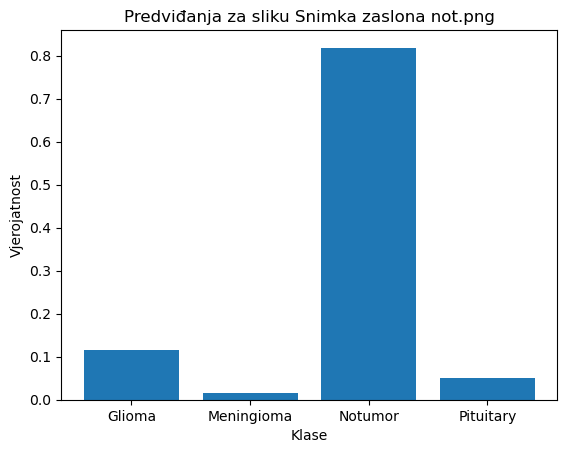

In [5]:
plt.bar(['Glioma', 'Meningioma', 'Notumor', 'Pituitary'], predictions[0])
plt.title(f"Predviđanja za sliku {filename}")
plt.xlabel("Klase")
plt.ylabel("Vjerojatnost")
plt.show()

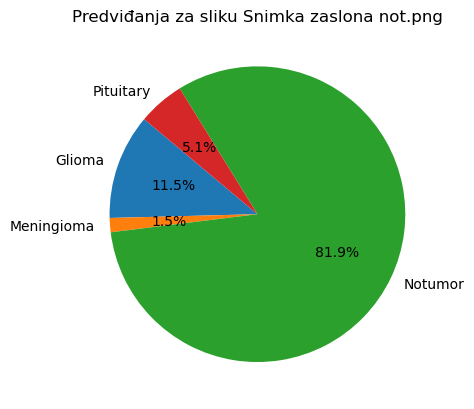

In [6]:
plt.pie(predictions[0], labels=['Glioma', 'Meningioma', 'Notumor', 'Pituitary'], autopct='%1.1f%%', startangle=140)
plt.title(f"Predviđanja za sliku {filename}")
plt.show()


## Literatura

- GeeksforGeeks. (12.1.2024). Introduction to TensorFlow. GeeksforGeeks. Dostupno na: https://www.geeksforgeeks.org/introduction-to-tensorflow/
- Scikit-learn Developers. (12.1.2024). train_test_split - scikit-learn. Scikit-learn Documentation. Dostupno na: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Stackabuse. (12.1.2024): image recognition in python with tensorflow and keras https://stackabuse.com/image-recognition-in-python-with-tensorflow-and-keras/

Izjavljujem da je rješenje zadatka izvorni rezultat mojeg rada te da se u izradi istoga nisam koristio drugim izvorima osim onima koji su u njemu navedeni. Za izradu rada su korištene etički prikladne i prihvatljive metode i tehnike rada.

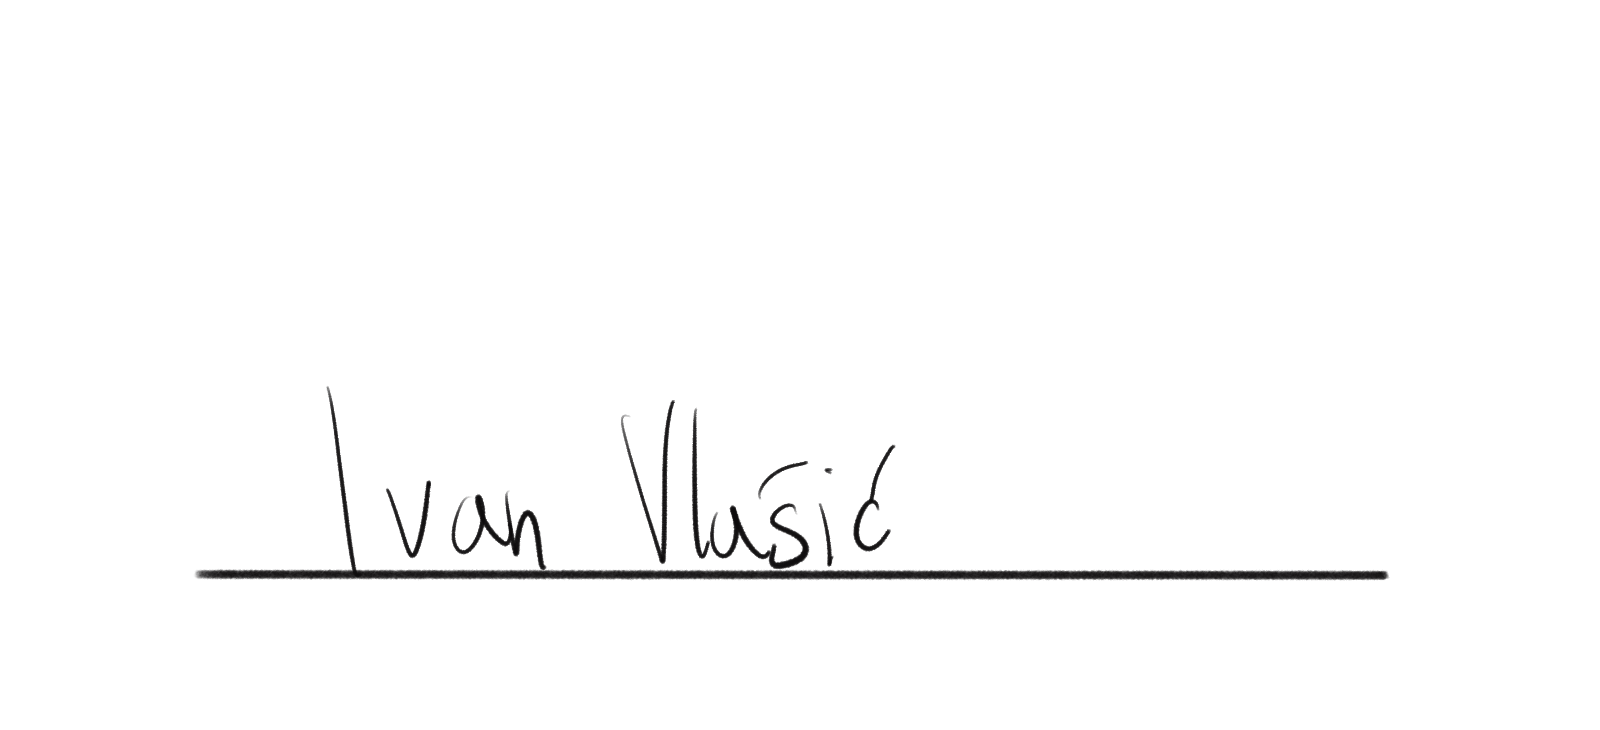